# Python para finanças - visualização de dados financeiros

In [1]:
!pip install yfinance

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

## Base de dados com uma ação

In [3]:
#gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2015-01-01')
gol_df = yf.download("GOLL4.SA", start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...
2024-10-15,1.07,1.10,1.07,1.08,1.08,1947200
2024-10-16,1.08,1.14,1.08,1.14,1.14,6653600
2024-10-17,1.13,1.16,1.10,1.11,1.11,4166000


In [5]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2441 entries, 2015-01-02 to 2024-10-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2441 non-null   float64
 1   High       2441 non-null   float64
 2   Low        2441 non-null   float64
 3   Close      2441 non-null   float64
 4   Adj Close  2441 non-null   float64
 5   Volume     2441 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 133.5 KB


In [6]:
gol_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500


In [7]:
gol_df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-17,1.13,1.16,1.10,1.11,1.11,4166000
2024-10-18,1.13,1.13,1.07,1.08,1.08,3480300
2024-10-21,1.09,1.09,1.08,1.09,1.09,105200


In [8]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2.441000e+03
mean,13.491282,13.826551,13.137866,13.456043,13.456043,6.632870e+06
std,9.405261,9.586548,9.214222,9.396020,9.396020,6.128056e+06
min,0.990000,1.000000,0.960000,0.980000,0.980000,0.000000e+00
25%,6.690000,6.940000,6.490000,6.680000,6.680000,2.428900e+06
50%,10.750000,11.070000,10.380000,10.690000,10.690000,4.957500e+06
75%,19.520000,20.049999,19.010000,19.530001,19.530001,9.102400e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,7.499800e+07


In [9]:
gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [10]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.20,1.26,1.14,1.16,1.16,3830600
2024-07-26,1.13,1.16,1.12,1.16,1.16,2676100


In [11]:
gol_df.to_csv('gol.csv')

In [12]:
gol_df2 = pd.read_csv('/content/gol.csv')
gol_df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
1,2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2,2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
3,2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
4,2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...,...
2436,2024-10-15,1.07,1.10,1.07,1.08,1.08,1947200
2437,2024-10-16,1.08,1.14,1.08,1.14,1.14,6653600
2438,2024-10-17,1.13,1.16,1.10,1.11,1.11,4166000
2439,2024-10-18,1.13,1.13,1.07,1.08,1.08,3480300


## Base de dados com mais ações

- BOVA11: https://www.sunoresearch.com.br/artigos/bova11/

In [13]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [14]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...
2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002
2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007
2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998


In [16]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [17]:
acoes_df.columns[0:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [18]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998


In [19]:
acoes_df.isnull().sum()

,0
GOL,0
CVC,0
WEGE,0
MGLU,0
TOTS,0
BOVA,27


In [20]:
acoes_df.shape

(2441, 6)

In [21]:
acoes_df.dropna(inplace=True)

In [22]:
acoes_df.shape

(2414, 6)

In [23]:
acoes_df.isnull().sum()

,0
GOL,0
CVC,0
WEGE,0
MGLU,0
TOTS,0
BOVA,0


In [24]:
acoes_df.to_csv('acoes.csv')

In [25]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2409,2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002
2410,2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007
2411,2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998
2412,2024-10-18,1.08,1.860000,55.220001,9.400000,28.540001,127.000000


In [26]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [27]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,13.374171,19.401964,21.327833,55.819543,20.062426,88.436317
std,9.383408,14.189595,14.596943,66.806849,9.594258,26.013403
min,0.980000,1.710000,4.942307,0.286077,7.138862,36.450001
25%,6.650000,8.699463,7.362499,9.344190,10.332433,63.472501
50%,10.595000,15.890467,16.200000,29.462685,19.425605,95.254997
75%,19.469999,28.916691,35.790001,65.542780,28.786771,109.997499
max,43.790001,53.407486,57.189999,256.746246,40.500488,133.619995


## Visualização

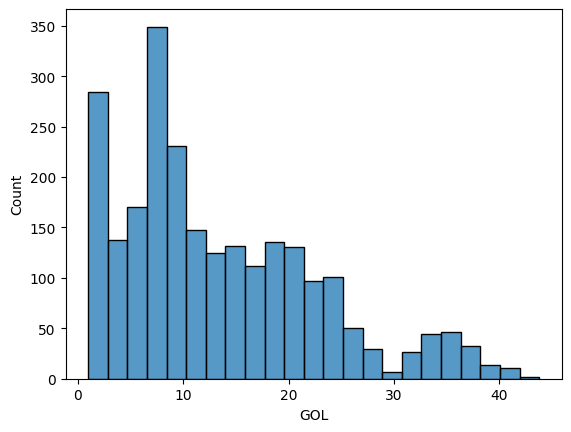

In [28]:
sns.histplot(acoes_df['GOL']);

In [29]:
len(acoes_df.columns)

7

In [30]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

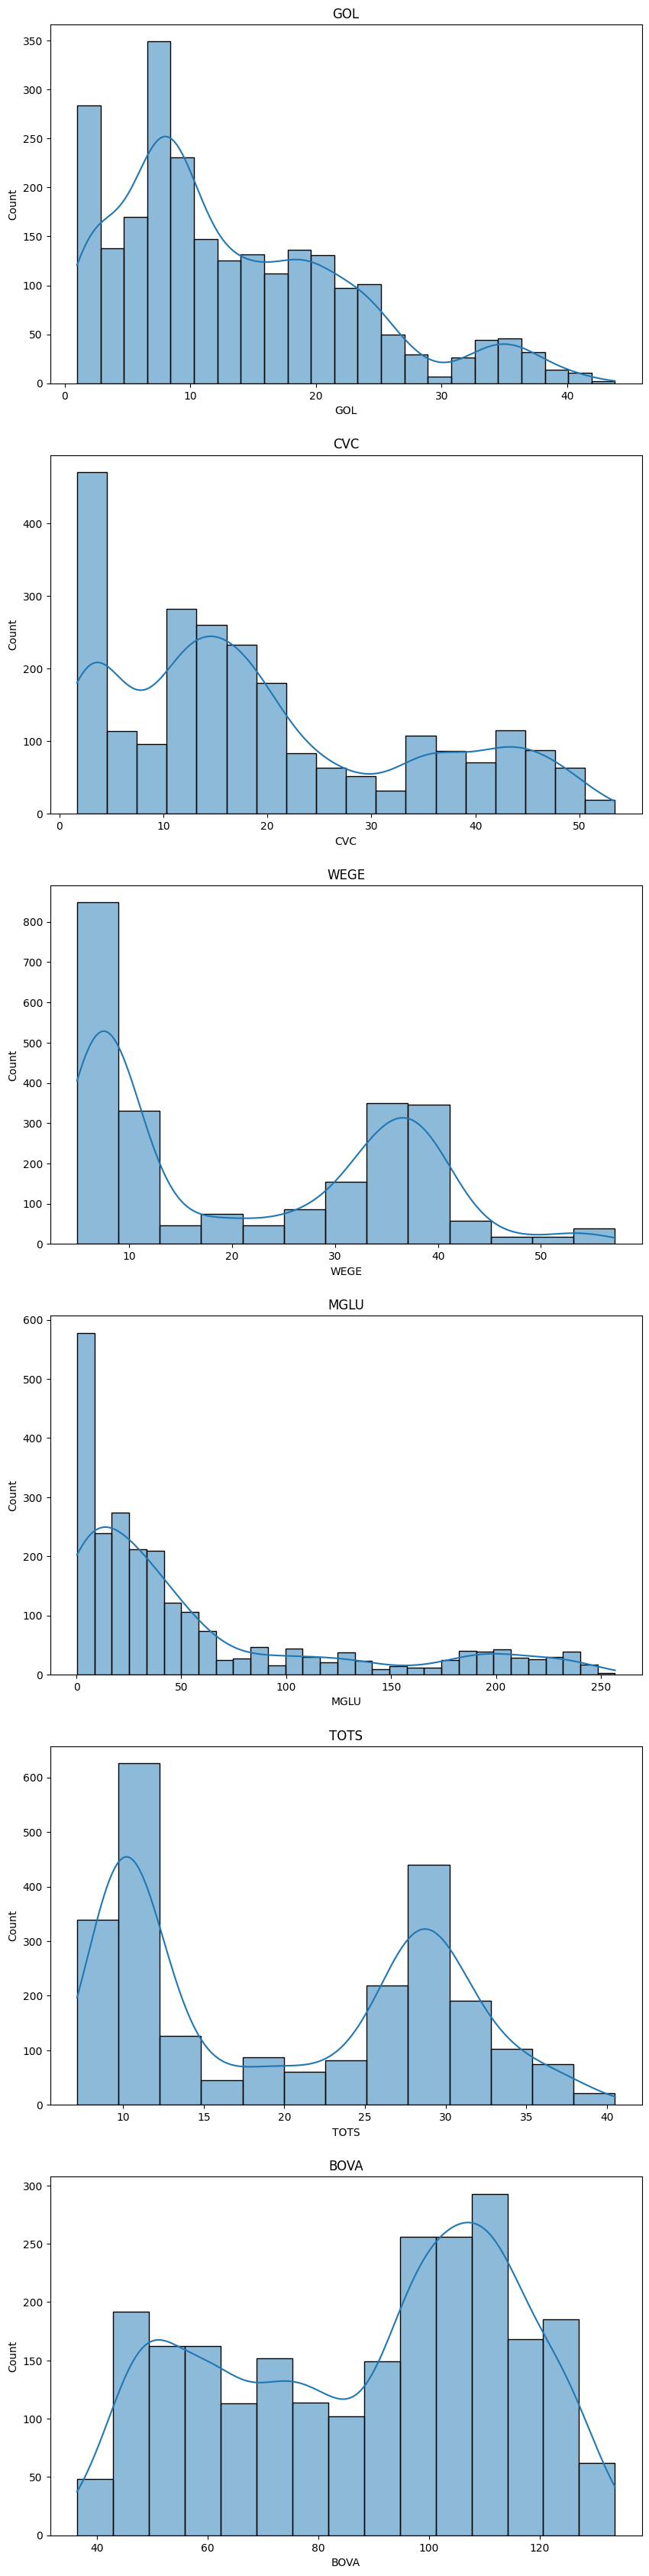

In [31]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [32]:
acoes_df['GOL'].describe()

,GOL
count,2414.000000
mean,13.374171
std,9.383408
min,0.980000
25%,6.650000
50%,10.595000
75%,19.469999
max,43.790001


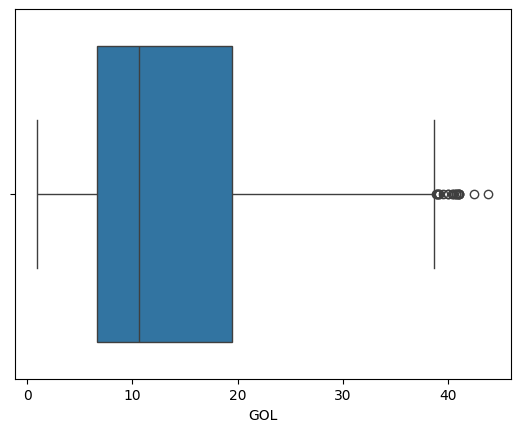

In [33]:
sns.boxplot(x = acoes_df['GOL']);

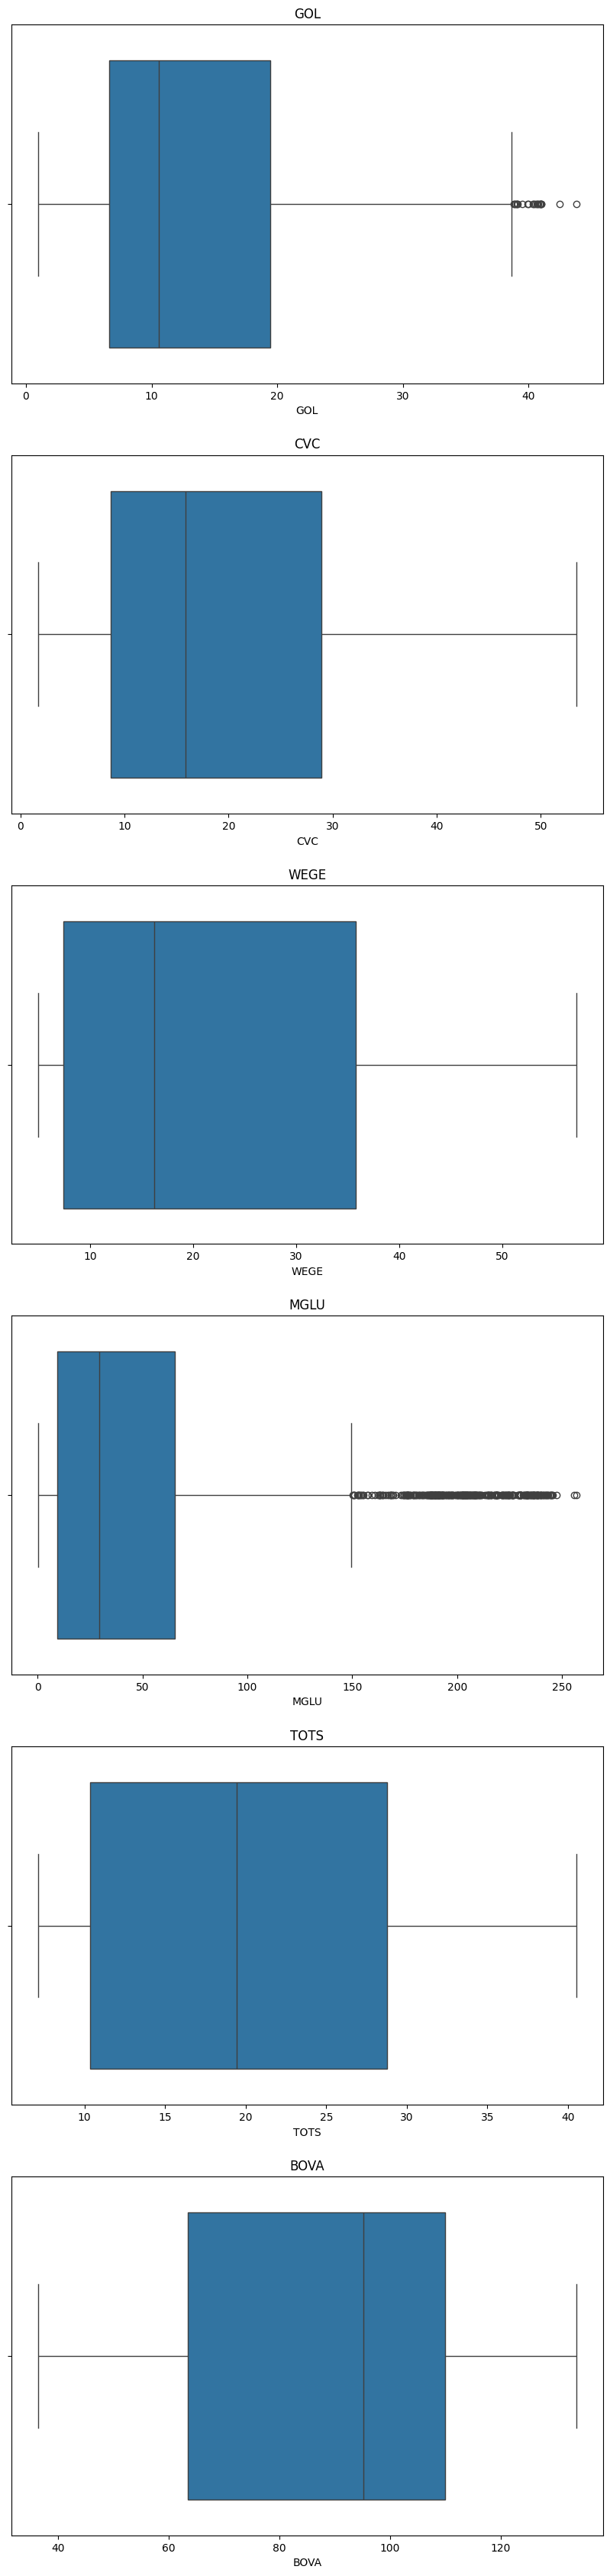

In [34]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

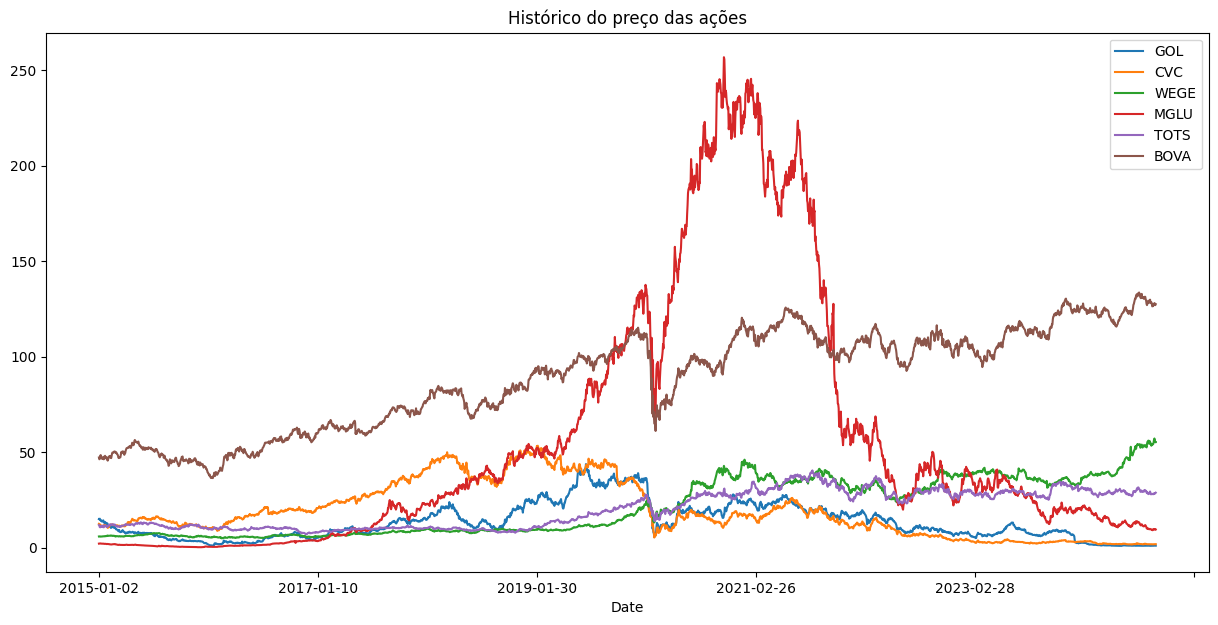

In [35]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [36]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2409,2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002
2410,2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007
2411,2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998
2412,2024-10-18,1.08,1.860000,55.220001,9.400000,28.540001,127.000000


In [37]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [38]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449
...,...,...,...,...,...,...,...
2409,2024-10-15,0.072048,0.146875,9.544027,4.454550,2.370069,2.695726
2410,2024-10-16,0.076051,0.148471,9.655456,4.500473,2.407102,2.709903
2411,2024-10-17,0.074049,0.146875,9.491690,4.394850,2.387744,2.693821
2412,2024-10-18,0.072048,0.148471,9.322859,4.316780,2.402052,2.687262


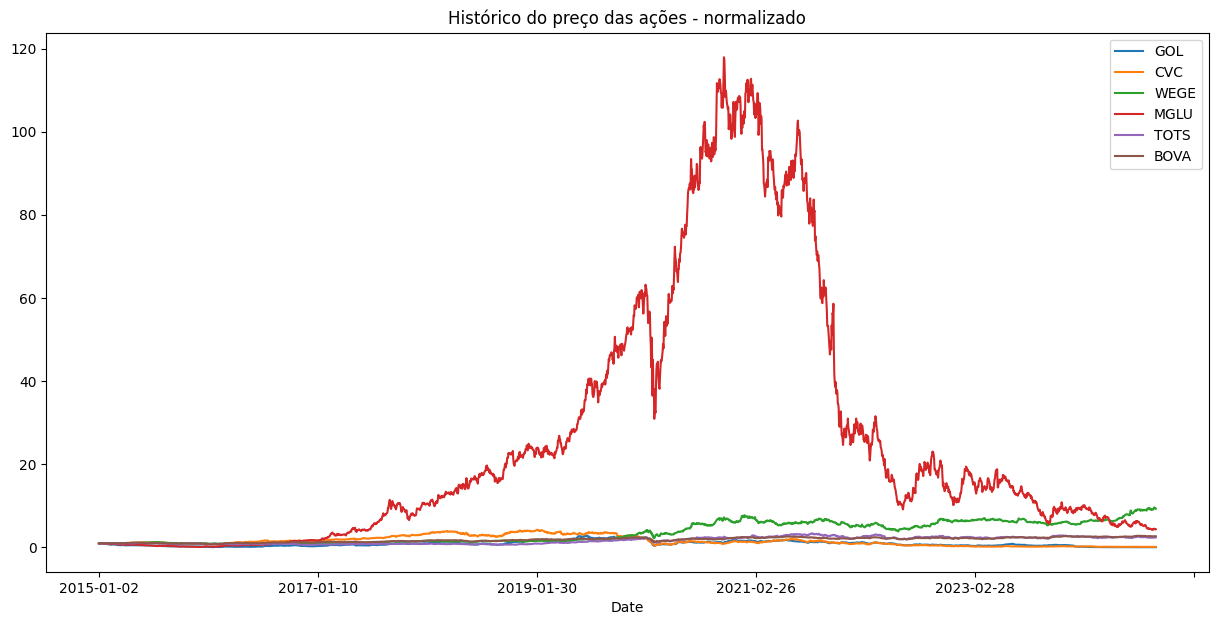

In [39]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [40]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [41]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

## Exercício e solução

In [42]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']

In [43]:
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  #acoes_ex_df[acao] = data.DataReader(acao, data_source='yahoo', start = '2015-01-01')['Close']
  acoes_ex_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [44]:
acoes_ex_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR3.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,8.518181,37.820000,9.000000,11.325000,47.259998
2015-01-05,15.730000,8.745454,37.070000,8.270000,11.090000,46.320000
2015-01-06,16.330000,8.681818,36.150002,8.060000,11.245000,46.580002
2015-01-07,16.559999,8.809090,37.389999,8.450000,11.740000,48.150002
2015-01-08,16.540001,8.781818,38.910000,9.020000,11.780000,48.509998
...,...,...,...,...,...,...
2024-10-15,12.880000,10.250000,53.150002,40.900002,26.469999,127.400002
2024-10-16,12.940000,10.360000,54.299999,40.779999,26.760000,128.070007
2024-10-17,12.860000,10.550000,54.500000,40.590000,26.719999,127.309998


In [45]:
acoes_ex_df.isnull().sum()

,0
ABEV3.SA,0
ODPV3.SA,0
VIVT3.SA,0
PETR3.SA,0
BBAS3.SA,0
BOVA11.SA,27


In [46]:
acoes_ex_df.dropna(inplace=True)
acoes_ex_df.shape

(2414, 6)

In [47]:
acoes_ex_df = acoes_ex_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})

In [48]:
acoes_ex_df.to_csv('acoes_ex.csv')

In [49]:
acoes_ex_df = pd.read_csv('acoes_ex.csv')
acoes_ex_df

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,8.518181,37.820000,9.000000,11.325000,47.259998
1,2015-01-05,15.730000,8.745454,37.070000,8.270000,11.090000,46.320000
2,2015-01-06,16.330000,8.681818,36.150002,8.060000,11.245000,46.580002
3,2015-01-07,16.559999,8.809090,37.389999,8.450000,11.740000,48.150002
4,2015-01-08,16.540001,8.781818,38.910000,9.020000,11.780000,48.509998
...,...,...,...,...,...,...,...
2409,2024-10-15,12.880000,10.250000,53.150002,40.900002,26.469999,127.400002
2410,2024-10-16,12.940000,10.360000,54.299999,40.779999,26.760000,128.070007
2411,2024-10-17,12.860000,10.550000,54.500000,40.590000,26.719999,127.309998
2412,2024-10-18,12.880000,10.730000,54.810001,40.369999,26.690001,127.000000


In [50]:
acoes_ex_df.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,16.644689,11.753932,42.759420,24.697954,17.881686,88.436330
std,2.771188,1.844001,5.652237,9.685519,5.662604,26.013421
min,11.030000,8.130000,28.980000,5.910000,6.350000,36.450001
25%,14.450000,10.382500,38.439999,15.970000,14.355000,63.472501
50%,16.895000,11.663636,42.450001,26.495000,16.905001,95.254997
75%,18.799999,12.868182,46.414999,31.459999,22.726251,109.997499
max,24.270000,16.754545,56.740002,44.540001,29.799999,133.619995


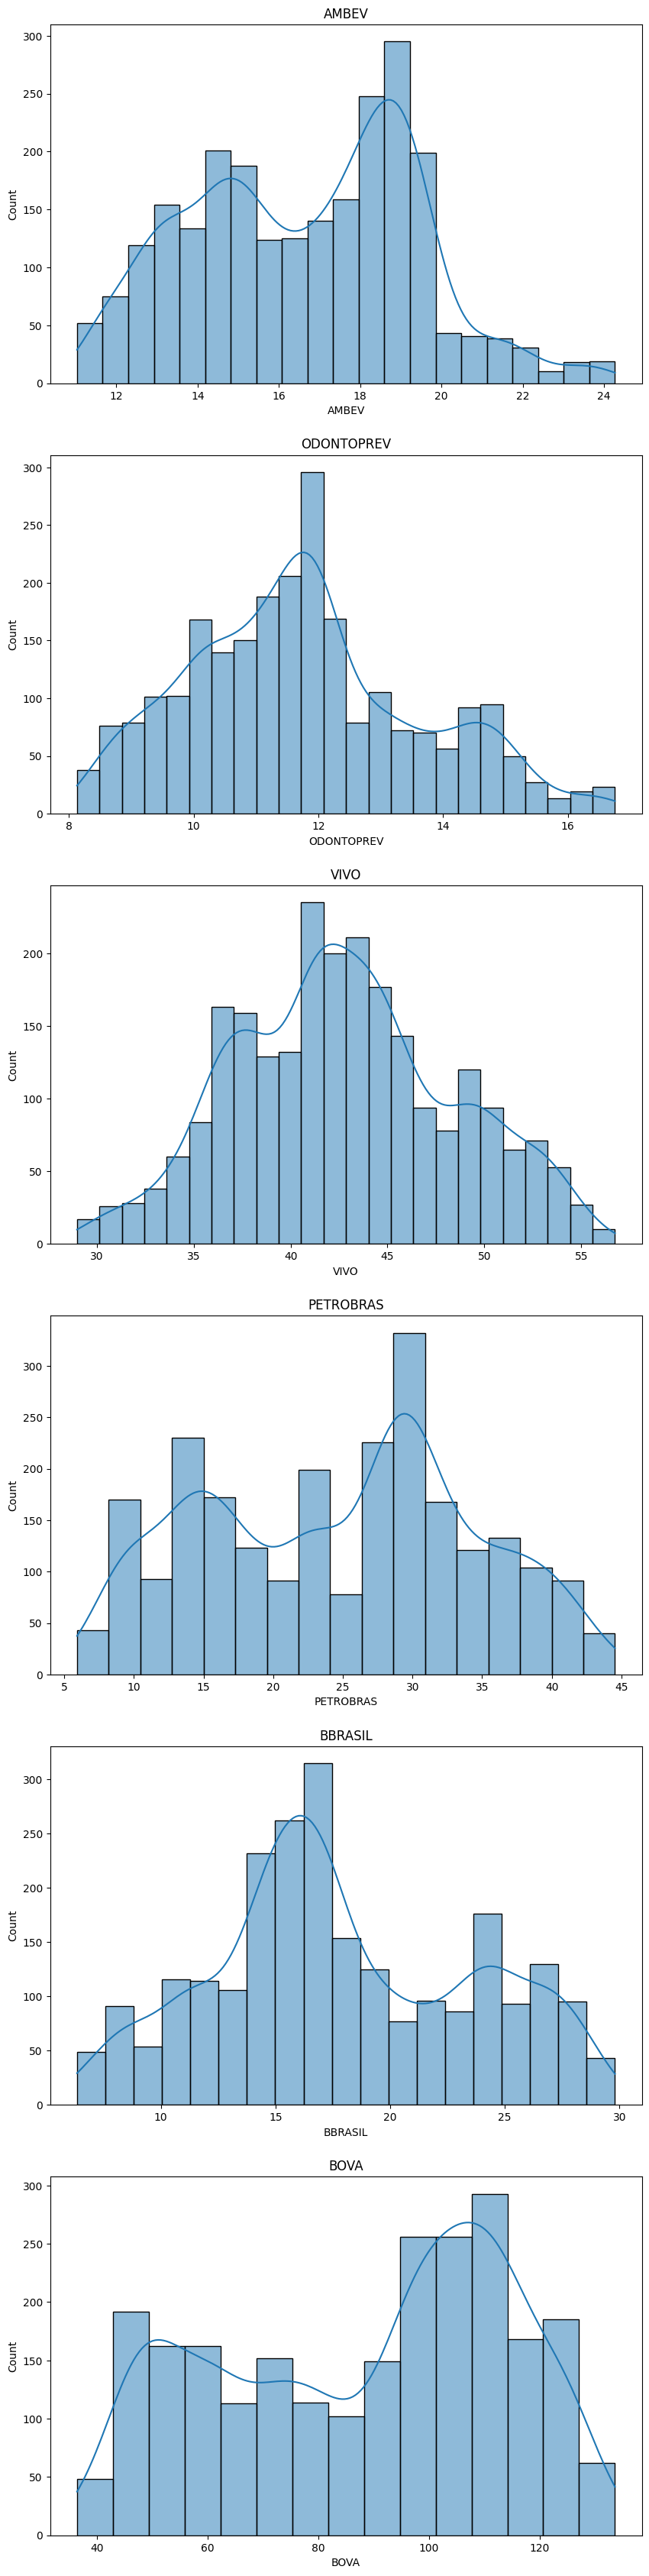

In [51]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_ex_df[acoes_ex_df.columns[i]], kde = True)
  plt.title(acoes_ex_df.columns[i])

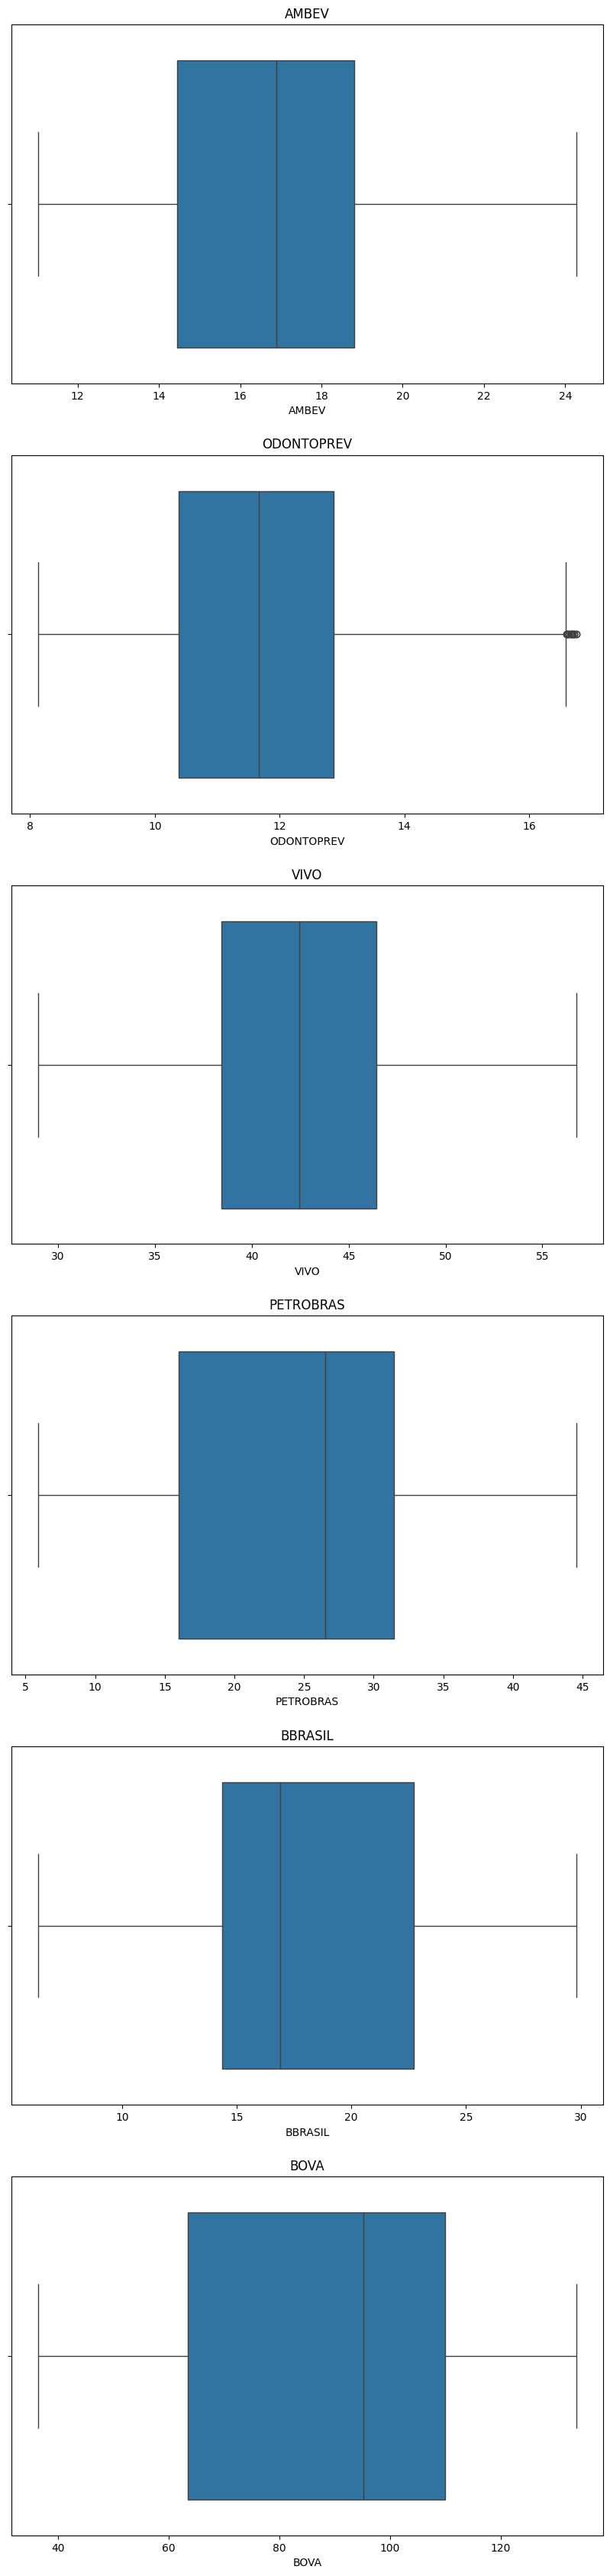

In [52]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_ex_df[acoes_ex_df.columns[i]])
  plt.title(acoes_ex_df.columns[i])

In [53]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_ex_df.columns[1:]:
  figura.add_scatter(x = acoes_ex_df['Date'], y = acoes_ex_df[i], name = i)
figura.show()

In [54]:
acoes_ex_df_normalizado = acoes_ex_df.copy()
for i in acoes_ex_df_normalizado.columns[1:]:
  acoes_ex_df_normalizado[i] = acoes_ex_df_normalizado[i] / acoes_ex_df_normalizado[i][0]

In [55]:
acoes_ex_df_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449
...,...,...,...,...,...,...,...
2409,2024-10-15,0.803995,1.203309,1.405341,4.544445,2.337307,2.695726
2410,2024-10-16,0.807740,1.216222,1.435748,4.531111,2.362914,2.709903
2411,2024-10-17,0.802747,1.238527,1.441037,4.510000,2.359382,2.693821
2412,2024-10-18,0.803995,1.259659,1.449233,4.485555,2.356733,2.687262


In [56]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_ex_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_ex_df_normalizado['Date'], y = acoes_ex_df_normalizado[i], name = i)
figura.show()

# Python para finanças - taxas de retorno

## Importação das bibliotecas e base de dados

In [57]:
import pandas as pd
import numpy as np
import plotly.express as px

In [58]:
dataset = pd.read_csv('acoes.csv')

In [59]:
dataset.shape

(2414, 7)

In [60]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2409,2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002
2410,2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007
2411,2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998
2412,2024-10-18,1.08,1.860000,55.220001,9.400000,28.540001,127.000000


## Taxa de retorno simples

In [61]:
len(dataset)

2414

In [62]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 1.090000033378601)

In [63]:
((dataset['GOL'][len(dataset) - 1] - dataset['GOL'][0]) / dataset['GOL'][0]) * 100

-92.72848532340376

In [64]:
((dataset['CVC'][len(dataset) - 1] - dataset['CVC'][0]) / dataset['CVC'][0]) * 100

-84.99323264535796

In [65]:
((dataset['WEGE'][len(dataset) - 1] - dataset['WEGE'][0]) / dataset['WEGE'][0]) * 100

833.1299992086359

In [66]:
((dataset['MGLU'][len(dataset) - 1] - dataset['MGLU'][0]) / dataset['MGLU'][0]) * 100

338.10726941909945

In [67]:
((dataset['TOTS'][len(dataset) - 1] - dataset['TOTS'][0]) / dataset['TOTS'][0]) * 100

142.6459301501461

In [68]:
((dataset['BOVA'][len(dataset) - 1] - dataset['BOVA'][0]) / dataset['BOVA'][0]) * 100

169.80534630728658

In [69]:
(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0] - 1) * 100

169.80534630728656

In [70]:
dataset['GOL']

,GOL
0,14.99
1,14.85
2,15.21
3,14.55
4,14.27
...,...
2409,1.08
2410,1.14
2411,1.11
2412,1.08


In [71]:
dataset['GOL'].shift(2)

,GOL
0,NaN
1,NaN
2,14.99
3,14.85
4,15.21
...,...
2409,1.08
2410,1.08
2411,1.08
2412,1.14


In [74]:
dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1

In [75]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
2409,2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002,0.000000
2410,2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007,0.055556
2411,2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998,-0.026316
2412,2024-10-18,1.08,1.860000,55.220001,9.400000,28.540001,127.000000,-0.027027


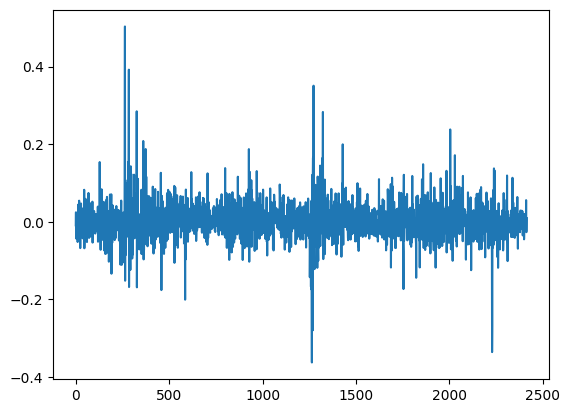

In [76]:
dataset['RS GOL'].plot();

In [77]:
dataset['RS GOL'].mean()

6.068774466103432e-05

In [78]:
dataset.head(245)

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
240,2015-12-22,2.49,10.178741,5.950000,0.397512,10.288458,42.230000,-0.110714
241,2015-12-23,2.46,10.285886,5.980769,0.431125,10.620344,42.750000,-0.012048
242,2015-12-28,2.39,10.261160,6.061538,0.591884,10.404618,42.500000,-0.028455
243,2015-12-29,2.39,10.796883,5.992307,0.655822,10.404618,42.419998,0.000000


In [79]:
(dataset['RS GOL'].mean() * 246) * 100

1.4929185186614444

In [80]:
dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1

In [81]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2024-10-15,1.08,1.840000,56.529999,9.700000,28.160000,127.400002,0.000000,-0.005405,0.027071,-0.010204,-0.003891,-0.000784
2410,2024-10-16,1.14,1.860000,57.189999,9.800000,28.600000,128.070007,0.055556,0.010870,0.011675,0.010309,0.015625,0.005259
2411,2024-10-17,1.11,1.840000,56.220001,9.570000,28.370001,127.309998,-0.026316,-0.010753,-0.016961,-0.023469,-0.008042,-0.005934
2412,2024-10-18,1.08,1.860000,55.220001,9.400000,28.540001,127.000000,-0.027027,0.010870,-0.017787,-0.017764,0.005992,-0.002435


In [82]:
(dataset['RS CVC'].mean() * 246) * 100

-0.5878236072809103

In [83]:
(dataset['RS WEGE'].mean() * 246) * 100

28.362226358287362

In [84]:
(dataset['RS MGLU'].mean() * 246) * 100

37.38007699266701

In [85]:
(dataset['RS TOTS'].mean() * 246) * 100

16.12318199236907

In [86]:
(dataset['RS BOVA'].mean() * 246) * 100

13.07256632173584

## Taxa de retorno logarítmica